# Lab 1.01 - Australian Athletes (ais)

In the Python cell below this one, paste all the imports you need for data analysis from the code examples (Numpy, Pandas, etc.).

In [7]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation

Declare a variable `ais` and use it to import the dataset from the CSV-file `ais.csv` in [the directory `data/`](https://github.com/HoGentTIN/dsai-en-labs/tree/main/data) of the [Github repository](https://github.com/HoGentTIN/dsai-en-labs/) for the lab assignments. You can import a dataset with a URL pointing to the raw contents of the CSV-file in the Github repository (see the code example!).

This dataset contains 202 observations of Australian athletes with a variety of blood values. You can find the codebook (i.e., the explanation of what each variable/column in the dataset means) in [data/ais.md](https://github.com/HoGentTIN/dsai-en-labs/blob/main/data/ais.md). Show the first few observations of this sample.

In [10]:
path = r'C:\Users\liamr\OneDrive\Documents\GitHub\dsai-labs\data\ais.csv'
ais = pd.read_csv(path)

Get general information about this dataset:

- How many rows and columns does the dataset have?
- Show general information about each variable, specifically the number of empty fields and the type of each variable (e.g., int64, float64, object)
- How many columns of each type are there?
- What is the measurement level (nominal, ordinal, interval, ratio) of each variable?

In [12]:
# How many  rows does the DataFrame have?
print(f"Number of rows: {len(ais)}")
# How many columns?
print(f"Number of columns: {len(ais.columns)}")
# How many rows and columns, i.e. the shape
print(f"The shape of the Data Frame is: {ais.shape}")
# General information about the DataFrame
print("*"*50)
print(ais.dtypes.value_counts())
ais.info()

Number of rows: 202
Number of columns: 14
The shape of the Data Frame is: (202, 14)
**************************************************
float64    10
int64       2
object      2
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      202 non-null    int64  
 1   rcc     202 non-null    float64
 2   wcc     202 non-null    float64
 3   hc      202 non-null    float64
 4   hg      202 non-null    float64
 5   ferr    202 non-null    int64  
 6   bmi     202 non-null    float64
 7   ssf     202 non-null    float64
 8   pcBfat  202 non-null    float64
 9   lbm     202 non-null    float64
 10  ht      202 non-null    float64
 11  wt      202 non-null    float64
 12  sex     202 non-null    object 
 13  sport   202 non-null    object 
dtypes: float64(10), int64(2), object(2)
memory usage: 22.2+ KB


The column "id" is not an actual variable, but an index. Mark it as such.

In [13]:
ais.set_index(['id'])

,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt,sex,sport
id,,,,,,,,,,,,,
1,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,78.9,f,B_Ball
2,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,74.4,f,B_Ball
3,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,69.1,f,B_Ball
4,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,57.18,185.0,74.9,f,B_Ball
5,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,53.20,184.6,64.6,f,B_Ball
...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,4.90,7.6,45.6,16.0,90,27.56,67.2,11.79,82.00,183.9,93.2,m,W_Polo
199,5.66,8.3,50.2,17.7,38,23.76,56.5,10.05,72.00,183.5,80.0,m,Tennis
200,5.03,6.4,42.7,14.3,122,22.01,47.6,8.51,68.00,183.1,73.8,m,Tennis


The variables that are now considered "object" are qualitative variables. Change the type of each of these variables to "category". For ordinal variables, also define a type and impose an order. Verify that the conversion was successful by requesting info about the types again.

In [14]:
ais.sex = ais.sex.astype('category')
ais.sport = ais.sport.astype('category')

Describe the columns `ferr`, `bmi`, `sex` and `sport` and the unique values in each of these columns. Do you recognize the characteristics of qualitative and quantitative variables in the result?

In [28]:
ais.ferr.describe()
#ais.sex.describe()

count    202.000000
mean      76.876238
std       47.501239
min        8.000000
25%       41.250000
50%       65.500000
75%       97.000000
max      234.000000
Name: ferr, dtype: float64

Select following elements from the dataset:

- the second row (ids = 2)
- rows 4 to 6 (ids = 5 to 7)
- Columns 6 to 8 (`ferr`, `bmi`, `ssf`)
- the variable `pcBfat` (by name!). There are multiple ways to retrieve this!
- all observations for the sport "Netball"
- just the variable `wt` of the observations for "Netball"
- which sports are played by athletes with a BMI higher than 26? Also, provide a list of the unique values and a frequency table of how often each sport occurs.

pcBfat


<Axes: xlabel='sport', ylabel='count'>

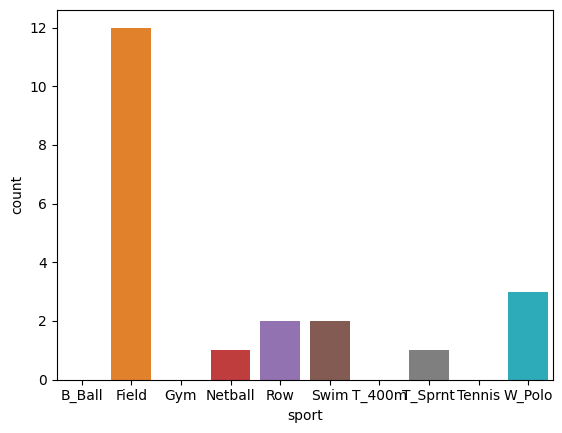

In [45]:
ais.iloc[1]
ais.iloc[4:7]
ais.iloc[:, 5:8]
print (f"{ais['pcBfat'].name}")
ais.query("(sport=='Netball')")
ais.query("(sport=='Netball')")['wt']
ais.query("(bmi > 26)")['sport'].describe()
ais.query("(bmi > 26)")['sport'].unique()
bmiHigherThan26 = ais.query("(bmi > 26)")['sport']
sns.countplot(data=ais.query("(bmi > 26)"),x='sport')